In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import zipfile
with zipfile.ZipFile("archive (4).zip", 'r') as z:
    z.extractall()
    print(z.namelist())

['Morning_Routine_Productivity_Dataset.csv']


In [71]:
df=pd.read_csv('Morning_Routine_Productivity_Dataset.csv')
df.head()

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Notes
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.


In [72]:
df.shape

(900, 11)

In [73]:

df.columns

Index(['Date', 'Wake-up Time', 'Sleep Duration (hrs)', 'Meditation (mins)',
       'Exercise (mins)', 'Breakfast Type', 'Journaling (Y/N)',
       'Work Start Time', 'Productivity Score (1-10)', 'Mood', 'Notes'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       900 non-null    object 
 1   Wake-up Time               900 non-null    object 
 2   Sleep Duration (hrs)       900 non-null    float64
 3   Meditation (mins)          900 non-null    int64  
 4   Exercise (mins)            900 non-null    int64  
 5   Breakfast Type             900 non-null    object 
 6   Journaling (Y/N)           900 non-null    object 
 7   Work Start Time            900 non-null    object 
 8   Productivity Score (1-10)  900 non-null    int64  
 9   Mood                       900 non-null    object 
 10  Notes                      900 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 77.5+ KB


In [75]:
df.describe()

,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Productivity Score (1-10)
count,900.000000,900.000000,900.000000,900.000000
mean,6.978444,14.711111,29.733333,5.811111
std,1.149872,9.937227,20.622568,2.157814
min,5.000000,0.000000,0.000000,1.000000
25%,5.900000,5.000000,10.000000,4.000000
50%,7.000000,15.000000,30.000000,6.000000
75%,8.000000,25.000000,50.000000,7.000000
max,9.000000,30.000000,60.000000,10.000000


In [76]:
df.isnull().sum()

Date                         0
Wake-up Time                 0
Sleep Duration (hrs)         0
Meditation (mins)            0
Exercise (mins)              0
Breakfast Type               0
Journaling (Y/N)             0
Work Start Time              0
Productivity Score (1-10)    0
Mood                         0
Notes                        0
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
print(df.Date.head())
print(df.Date.tail())

0    2023-02-01 10:21:52.870632
1    2023-02-02 10:21:52.870632
2    2023-02-03 10:21:52.870632
3    2023-02-04 10:21:52.870632
4    2023-02-05 10:21:52.870632
Name: Date, dtype: object
895    2025-07-15 10:21:52.870632
896    2025-07-16 10:21:52.870632
897    2025-07-17 10:21:52.870632
898    2025-07-18 10:21:52.870632
899    2025-07-19 10:21:52.870632
Name: Date, dtype: object


In [79]:
df['Wake-up Time'].unique()

array(['5:30 AM', '8:15 AM', '8:30 AM', '5:00 AM', '5:15 AM', '7:15 AM',
       '4:30 AM', '6:45 AM', '7:45 AM', '4:15 AM', '4:00 AM', '8:45 AM',
       '7:00 AM', '9:45 AM', '5:45 AM', '6:30 AM', '9:00 AM', '9:30 AM',
       '6:00 AM', '6:15 AM', '4:45 AM', '8:00 AM', '7:30 AM', '9:15 AM'],
      dtype=object)

OUTLIER CHECKING

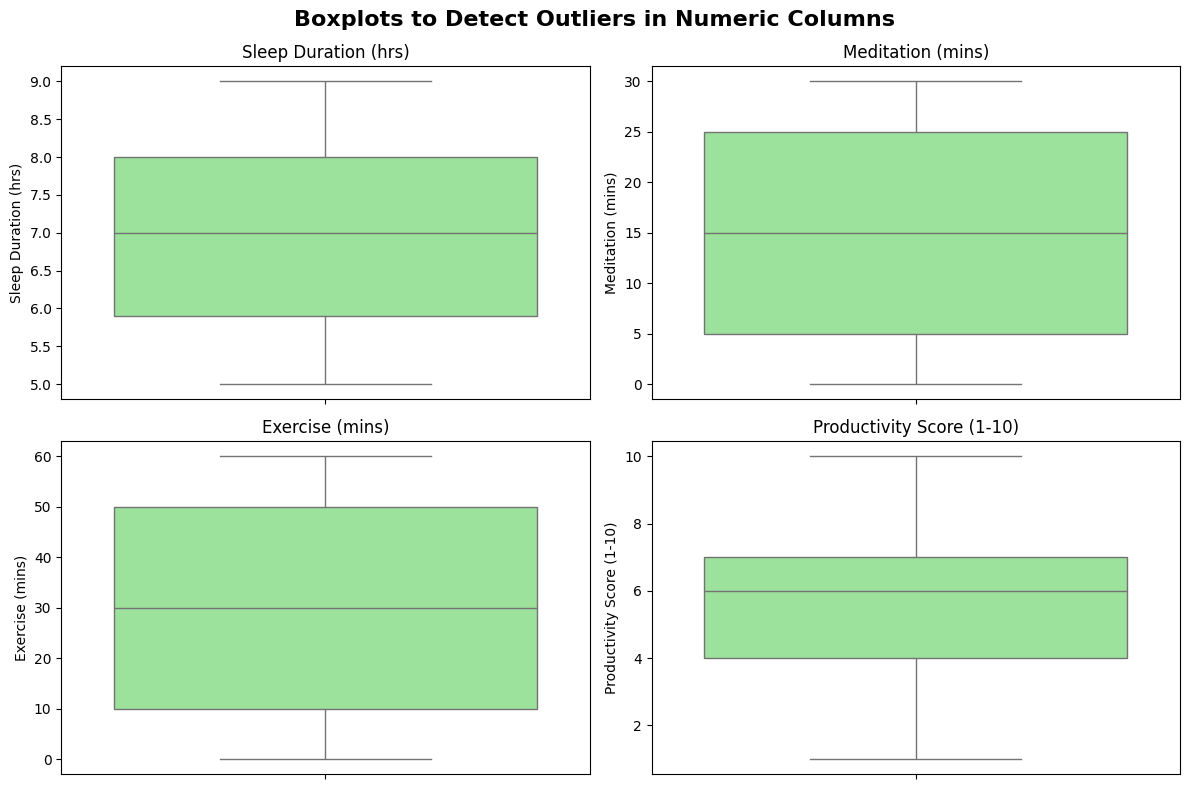

In [80]:
cols = ['Sleep Duration (hrs)', 'Meditation (mins)', 'Exercise (mins)', 'Productivity Score (1-10)']
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col],color='lightgreen')
    plt.title(f'{col}')
    plt.ylabel(col)

plt.suptitle("Boxplots to Detect Outliers in Numeric Columns", fontsize=16, fontweight='bold')
plt.tight_layout()


DISTRIBUTION

       Sleep Duration (hrs)  Meditation (mins)  Exercise (mins)  \
count            900.000000         900.000000       900.000000   
mean               6.978444          14.711111        29.733333   
std                1.149872           9.937227        20.622568   
min                5.000000           0.000000         0.000000   
25%                5.900000           5.000000        10.000000   
50%                7.000000          15.000000        30.000000   
75%                8.000000          25.000000        50.000000   
max                9.000000          30.000000        60.000000   

       Productivity Score (1-10)  
count                 900.000000  
mean                    5.811111  
std                     2.157814  
min                     1.000000  
25%                     4.000000  
50%                     6.000000  
75%                     7.000000  
max                    10.000000  

Skewness:
 Sleep Duration (hrs)         0.013935
Meditation (mins)            0.

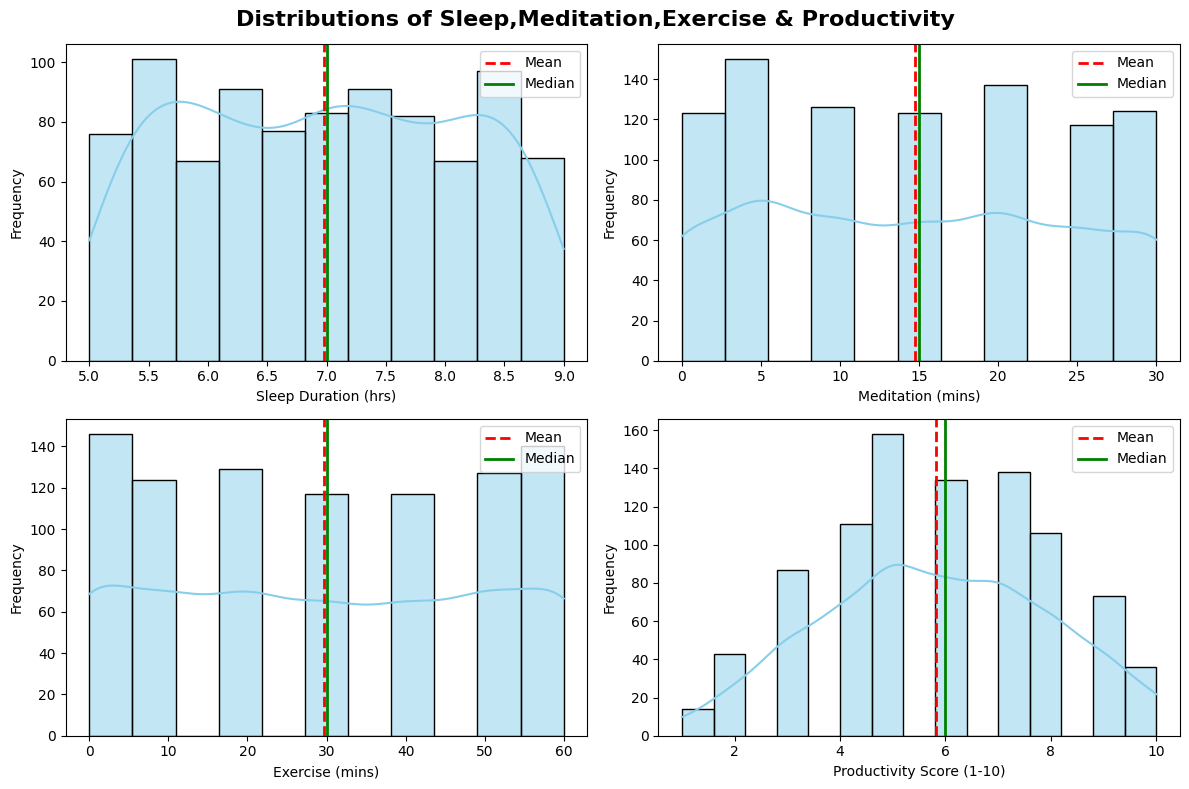

In [81]:
num_df = df[cols]
print(num_df.describe())
print("\nSkewness:\n",num_df.skew())
plt.figure(figsize=(12,8))

for i,col in enumerate(cols,1):
    plt.subplot(2,2,i)
    sns.histplot(num_df[col],kde=True,color='skyblue',edgecolor='black')
    plt.axvline(num_df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    plt.axvline(num_df[col].median(), color='green', linestyle='-', linewidth=2, label='Median')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
plt.suptitle('Distributions of Sleep,Meditation,Exercise & Productivity', fontsize=16, fontweight='bold')
plt.tight_layout()


CORRELATION

Text(0.5, 1.0, 'Correlation Heatmap-Numerical Columns Only')

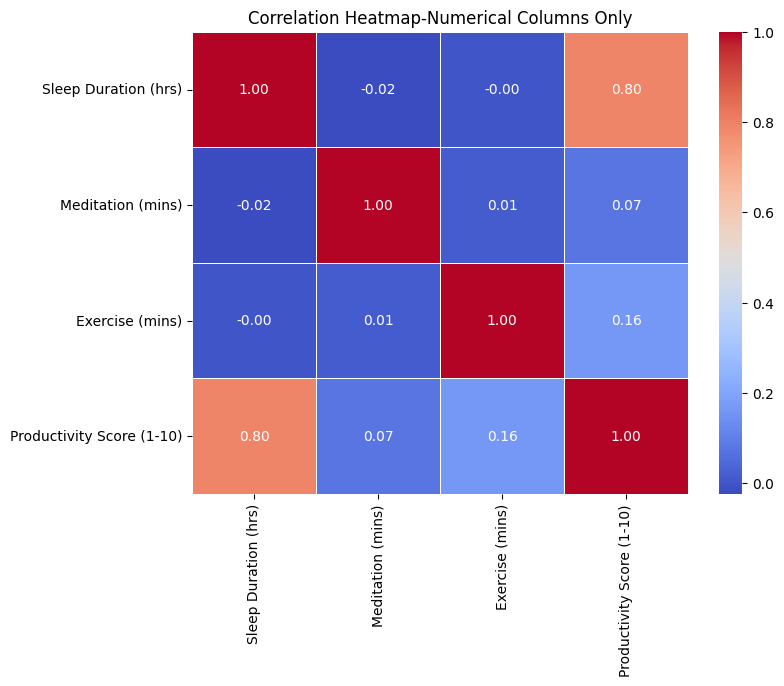

In [82]:
numeric_df=df[['Sleep Duration (hrs)','Meditation (mins)','Exercise (mins)','Productivity Score (1-10)']]
corr=numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap-Numerical Columns Only")

In [83]:
#unique values and to see whether sleep hours are discrete or continuous
sleep_unique=df['Sleep Duration (hrs)'].unique()
sort_sleep=np.sort(sleep_unique)
print(sort_sleep)

[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7
 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5
 8.6 8.7 8.8 8.9 9. ]


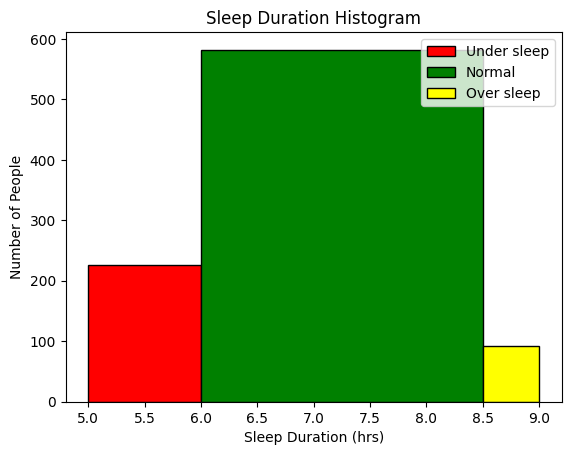

In [84]:
#to compare healthy,undersleep,oversleep
sleep_data=df['Sleep Duration (hrs)']

under_sleep=sleep_data[(sleep_data>=5)&(sleep_data<6)]
normal_sleep=sleep_data[(sleep_data>=6)&(sleep_data<=8.5)]
over_sleep=sleep_data[(sleep_data>8.5)&(sleep_data<=9)]

plt.hist(under_sleep,bins=[5,6],color='red',edgecolor='black',label='Under sleep')
plt.hist(normal_sleep,bins=[6,8.5],color='green',edgecolor='black',label='Normal')
plt.hist(over_sleep, bins=[8.5,9],color='yellow',edgecolor='black',label='Over sleep')
plt.xlabel('Sleep Duration (hrs)')
plt.ylabel('Number of People')
plt.title('Sleep Duration Histogram')
plt.legend()


In [85]:
print(len(under_sleep))
print(len(normal_sleep))
print(len(over_sleep))

226
582
92


Text(0.5, 1.0, 'Days with More vs Less Total Minutes of Meditation + Exercise')

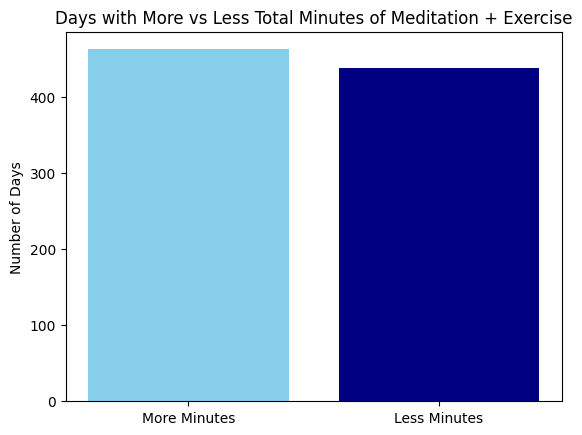

In [86]:
#counting more minutes and less minutes for healthy day
total_mins=df['Meditation (mins)'] + df['Exercise (mins)']
average=total_mins.mean()
more_mins=total_mins[total_mins>average]
less_mins=total_mins[total_mins<average]
more_min_count=len(more_mins)
less_min_count=len(less_mins)
plt.bar(['More Minutes', 'Less Minutes'],[more_min_count, less_min_count],color=['skyblue','navy'])
plt.ylabel('Number of Days')
plt.title('Days with More vs Less Total Minutes of Meditation + Exercise')

In [87]:
breakfast_counts=df['Breakfast Type'].value_counts()
print(breakfast_counts)

Breakfast Type
Heavy           197
Carb-rich       189
Protein-rich    173
Light           172
Skipped         169
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x24efc1aa140>,
 [Text(0.8500069202607615, 0.6982035774104968, 'Heavy'),
  Text(-0.49253505623107574, 0.9835696306736251, 'Carb-rich'),
  Text(-1.08645718962887, -0.17207781700073332, 'Protein-rich'),
  Text(-0.22870259681029675, -1.0759624167284967, 'Light'),
  Text(0.9140829085911598, -0.6119251884189157, 'Skipped')],
 [Text(0.4636401383240517, 0.38083831495118, '21.9%'),
  Text(-0.2686554852169504, 0.5364925258219773, '21.0%'),
  Text(-0.5926130125248381, -0.09386062745494543, '19.2%'),
  Text(-0.12474687098743457, -0.5868885909428163, '19.1%'),
  Text(0.49859067741335983, -0.33377737550122677, '18.8%')])

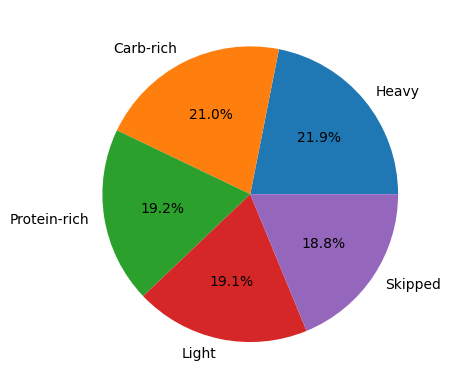

In [88]:
#pie chart for breakfast
plt.pie(breakfast_counts,labels=breakfast_counts.index,autopct='%1.1f%%')


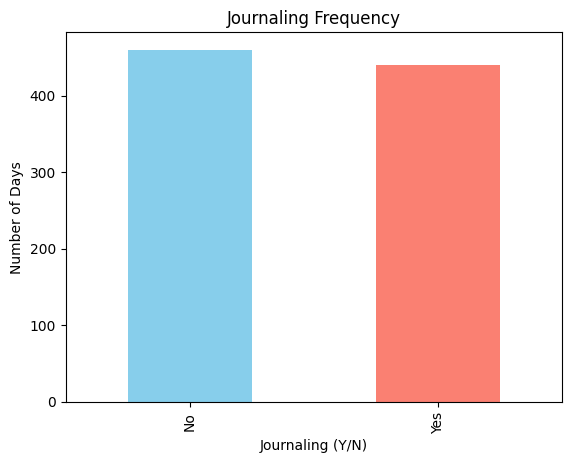

In [89]:
#journaling bar chart
df['Journaling (Y/N)'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('Journaling Frequency')
plt.ylabel('Number of Days')
plt.show()

ANALYSIS

<Axes: xlabel='Sleep Duration (hrs)', ylabel='Productivity Score (1-10)'>

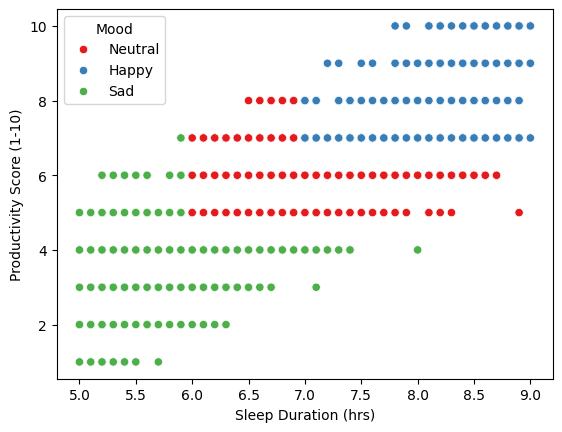

In [90]:
sns.scatterplot(x='Sleep Duration (hrs)',y='Productivity Score (1-10)',hue='Mood',data=df,palette='Set1')

In [91]:
mood_counts=df['Mood'].value_counts()
print(mood_counts)

Mood
Sad        315
Happy      313
Neutral    272
Name: count, dtype: int64


In [100]:
print(round((mood_counts/900)*100,2))

Mood
Sad        35.00
Happy      34.78
Neutral    30.22
Name: count, dtype: float64


FEATURE ENGINEERING

In [92]:

df['Mood_encoded']=df['Mood'].map({'Sad':0,'Neutral':1,'Happy':2})
df.drop(columns='Mood',inplace=True)
df.head(2)


,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Notes,Mood_encoded
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Collection whole decision middle.,1
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Tree player behavior various up such attention...,2


In [93]:
df_corr=df['Mood_encoded'].corr(df['Productivity Score (1-10)'])
print(df_corr)

0.8823742659459619


In [94]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

C:\Users\durka\AppData\Local\Temp\ipykernel_18532\2169980441.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)


In [95]:
df['Journaling']=df['Journaling (Y/N)'].map({'Yes':1,'No':0})
df.drop(columns='Journaling (Y/N)',inplace=True)
df.head(2)

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Work Start Time,Productivity Score (1-10),Notes,Mood_encoded,Journaling
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,6:30 AM,6,Collection whole decision middle.,1,1
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,11:15 AM,7,Tree player behavior various up such attention...,2,0


In [96]:
df=pd.get_dummies(df,columns=['Breakfast Type'],drop_first=True)
bool_cols=df.select_dtypes(include='bool').columns
df[bool_cols]=df[bool_cols].astype(int)
df.head(2)

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Work Start Time,Productivity Score (1-10),Notes,Mood_encoded,Journaling,Breakfast Type_Heavy,Breakfast Type_Light,Breakfast Type_Protein-rich,Breakfast Type_Skipped
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,6:30 AM,6,Collection whole decision middle.,1,1,0,0,1,0
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,11:15 AM,7,Tree player behavior various up such attention...,2,0,1,0,0,0


In [97]:

df['Wake-up Time']=pd.to_datetime(df['Wake-up Time'],format='%I:%M %p').dt.time
df['Work Start Time']=pd.to_datetime(df['Work Start Time'],format='%I:%M %p').dt.time
df.head(2)

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Work Start Time,Productivity Score (1-10),Notes,Mood_encoded,Journaling,Breakfast Type_Heavy,Breakfast Type_Light,Breakfast Type_Protein-rich,Breakfast Type_Skipped
0,2023-02-01 10:21:52.870632,05:30:00,6.6,20,60,06:30:00,6,Collection whole decision middle.,1,1,0,0,1,0
1,2023-02-02 10:21:52.870632,08:15:00,8.0,5,50,11:15:00,7,Tree player behavior various up such attention...,2,0,1,0,0,0
